In [1]:
# import necessary modules
import pandas as pd #data processing
import numpy as np #linear algebra

In [2]:
# import data and creating a dataframe
data =pd.read_csv("S:\datasets\HyderabadResturants.csv")

In [3]:
data.head().style.set_properties(**{'background-color':'black','color':'lawngreen','border-color':'white'})

,links,names,ratings,cuisine,price for one
0,https://www.zomato.com/hyderabad/sahara-bakers-rtc-x-roads/order,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,https://www.zomato.com/hyderabad/kfc-abids/order,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,https://www.zomato.com/hyderabad/subbaiah-gari-hotel-malakpet/order,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,https://www.zomato.com/hyderabad/paradise-biryani-1-charminar/order,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,https://www.zomato.com/hyderabad/pista-house-bakery-ghansi-bazaar/order,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rolls, Salad, Desserts",100


In [4]:
# rows and columns
data.shape

(657, 5)

In [5]:
#checking schema of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   links          657 non-null    object
 1   names          657 non-null    object
 2   ratings        657 non-null    object
 3   cuisine        657 non-null    object
 4   price for one  657 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 25.8+ KB


In [6]:
#displaying columns
data.columns

Index(['links', 'names', 'ratings', 'cuisine', 'price for one'], dtype='object')

In [7]:
#we dont want links column so need to drop it
#Dropping links
data.drop('links',axis=1,inplace=True)

In [8]:
data.head().style.set_properties(**{'background-color':'black','color':'lawngreen','border-color':'white'})

,names,ratings,cuisine,price for one
0,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rolls, Salad, Desserts",100


In [9]:
data.rename(columns={'names':'Restaurant names'},inplace=True)

In [10]:
data.head(20).style.set_properties(**{'background-color':'black','color':'lawngreen','border-color':'white'})

,Restaurant names,ratings,cuisine,price for one
0,Sahara Bakers,3.7,"Chinese, Bakery, Sichuan, Pizza, Burger",100
1,KFC,3.9,"Burger, Fast Food, Biryani, Desserts, Beverages",100
2,Subbaiah Gari Hotel,4.1,"South Indian, Andhra, Mithai",100
3,Paradise Biryani,3.9,"Biryani, Kebab, Desserts, Beverages",100
4,Pista House Bakery,4.3,"Fast Food, Sandwich, Pizza, Burger, Wraps, Rolls, Salad, Desserts",100
5,Shah Ghouse Hotel & Restaurant,4,"North Indian, Chinese, Mughlai, Mandi, Sichuan, Shawarma, Seafood, Beverages",100
6,Swagath Hotel,4.2,"South Indian, Chinese, North Indian",100
7,Just Parantha,4.2,North Indian,100
8,Mehfil,4.1,"North Indian, Biryani, Mughlai",100
9,Cream Stone,4.3,"Ice Cream, Desserts",150


In [11]:
#getting an overview or schema
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Restaurant names  657 non-null    object
 1   ratings           657 non-null    object
 2   cuisine           657 non-null    object
 3   price for one     657 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 20.7+ KB


In [12]:
#stat approach
data.describe() #it wull automatically apply stat for "price of one column" as there is only one numeric column

,price for one
count,657.000000
mean,169.406393
std,97.178712
min,50.000000
25%,100.000000
50%,150.000000
75%,250.000000
max,400.000000


In [13]:
#shape before duplicates -(657,4)
#dropping duplicates
data.drop_duplicates(inplace=True)
data.shape

#concl- no duplicates

(657, 4)

In [14]:
#data cleaning
#checking for null values
data.isnull().sum()

Restaurant names    0
ratings             0
cuisine             0
price for one       0
dtype: int64

In [15]:
#cleaning ratings column
data['ratings'].unique()

array(['3.7', '3.9', '4.1', '4.3', '4', '4.2', '4.4', '4.5', '3.8', '4.6',
       '3.6', 'New', '3.4', '3.5', '3.1', '3.3', '2.7', '3.2', '-', '3',
       '4.7', '2.8', '2.9', '2.6'], dtype=object)

In [16]:
#removing New and -

def modify(r_t):
    if (r_t=='New' or r_t=='-'):
        return np.nan
    else:
        return float(r_t)

        
data['ratings']=data['ratings'].apply(modify)
data['ratings'].fillna(round(data['ratings'].mean()),inplace=True)
data['ratings']

0      3.7
1      3.9
2      4.1
3      3.9
4      4.3
      ... 
652    3.2
653    4.0
654    3.8
655    4.0
656    3.4
Name: ratings, Length: 657, dtype: float64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657 entries, 0 to 656
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Restaurant names  657 non-null    object 
 1   ratings           657 non-null    float64
 2   cuisine           657 non-null    object 
 3   price for one     657 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 25.7+ KB


In [18]:
data['cuisine'].value_counts()

South Indian                                                                         67
Bakery, Desserts                                                                     23
Mithai, Street Food                                                                  22
Mithai                                                                               14
North Indian, Chinese                                                                13
                                                                                     ..
Chinese, North Indian, Sichuan                                                        1
Mithai, Desserts, Street Food                                                         1
Biryani, Cafe, North Indian, Continental, Street Food, Beverages, Desserts, Pizza     1
South Indian, Street Food, Juices, Beverages                                          1
Chinese, Momos                                                                        1
Name: cuisine, Length: 396, dtyp

In [19]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\shashank malik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cuisine', ylabel='count'>

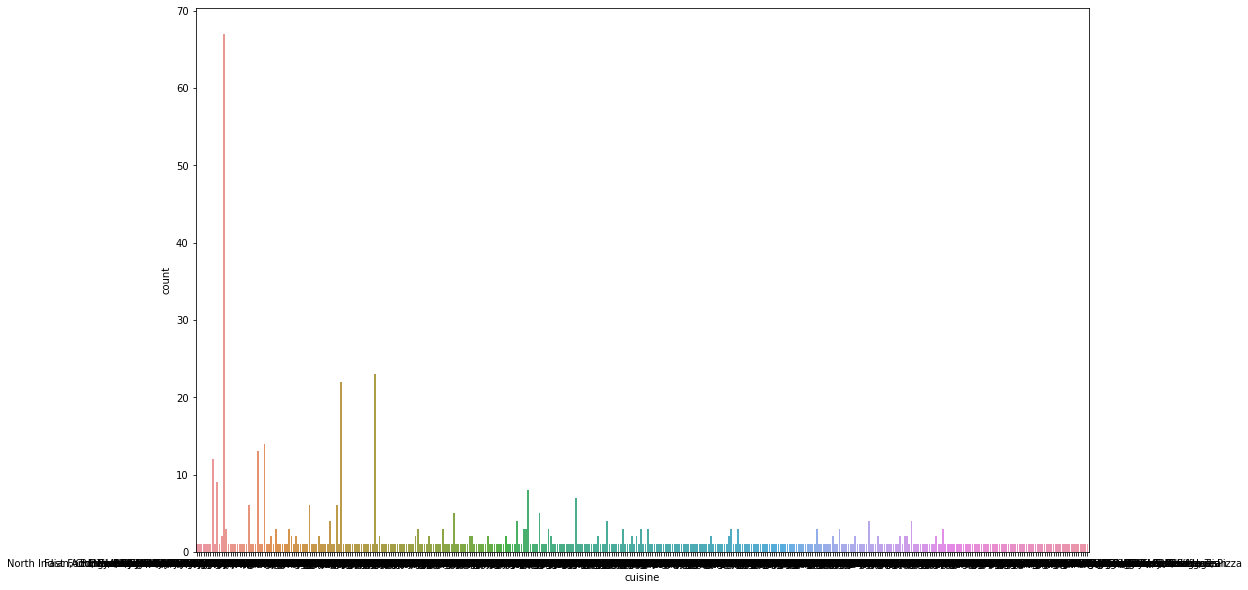

In [20]:
plt.figure(figsize=(16,10))
sns.countplot(data['cuisine'])

C:\Users\shashank malik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings', ylabel='count'>

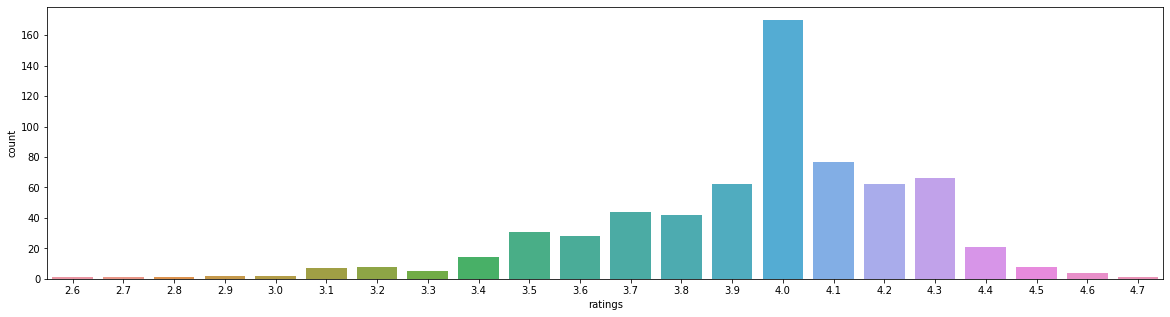

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(data['ratings'])

C:\Users\shashank malik\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


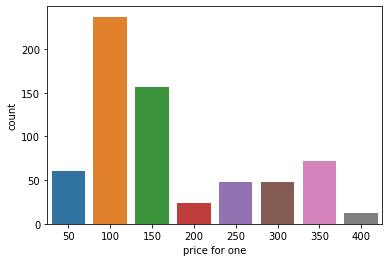

In [22]:
sns.countplot(data['price for one'])
plt.show()

<AxesSubplot:>

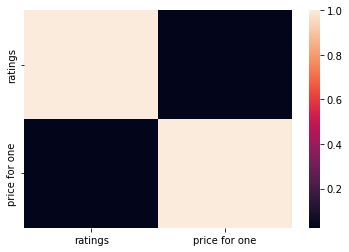

In [23]:
#co relation between ratings and proce for one
corr=data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

In [24]:
corr=data.corr()

In [25]:
corr

,ratings,price for one
ratings,1.000000,0.024243
price for one,0.024243,1.000000


(657, 3) (657,)


(459, 3) (459,) (198, 3) (198,)


,Restaurant names,ratings,cuisine
19,KS Bakers,4.1,"Bakery, Fast Food, Pizza, Burger"
540,Sambhar Bhojanam Mess,4.0,"South Indian, North Indian"
639,Sankla Tiffins & Dhaba,4.0,"Chinese, South Indian, North Indian"
284,Samosa Party,4.0,"Street Food, Beverages"
197,Grand Bawarchi Restaurant,4.3,"North Indian, Chinese, Biryani"
...,...,...,...
578,Italian Express,4.0,"Chinese, Fast Food, Pizza, Pasta, Italian"
53,Kwality Wall’s Frozen Dessert and Ice Cream Shop,4.5,Ice Cream
350,A1 Fast Food And Nahari Centre,3.5,"Chinese, Mughlai"
79,Pathemari Kerala Restaurant,4.1,"Kerala, Biryani, South Indian"


((459, 742), (198, 336))

ValueError: X has 336 features, but MinMaxScaler is expecting 742 features as input.